<a href="https://colab.research.google.com/github/teoz97/Sensores_2020/blob/master/DL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LOAD LIBRARIES KERAS***

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution3D,MaxPooling3D,Flatten,Dropout
from keras.utils import np_utils
from numpy.random import seed
from time import time
import numpy as np
import matplotlib.pyplot as plt

Start Time and **Load** **Image**

In [239]:
Start=time()
(xtrain, ytrain),(xtest, ytest)=cifar10.load_data()
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
np.shape(xtrain)
np.shape(ytrain)
np.shape(xtest)
np.shape(ytest)
print("the dimesions of xtrain are: "+str(np.shape(xtrain))+"\nthe dimesions of ytrain are: " +str(np.shape(ytrain))+"\nthe dimesions of xtest are: " +str(np.shape(xtest))+"\nthe dimesions of ytest are: " +str(np.shape(ytest)))

the dimesions of xtrain are: (50000, 32, 32, 3)
the dimesions of ytrain are: (50000, 1)
the dimesions of xtest are: (10000, 32, 32, 3)
the dimesions of ytest are: (10000, 1)


**Show Image 10**

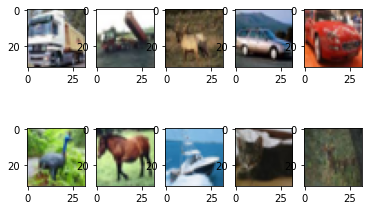

In [240]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(xtrain[i])     

**Reshape**

In [259]:
Xtrain=xtrain.reshape(50000, 32, 32,3,1)
Xtest=xtest.reshape(10000, 32, 32,3,1)
Ytrain=np_utils.to_categorical(ytrain,10)
Ytest=np_utils.to_categorical(ytest,10)

print(Xtrain.shape)
print(Ytrain.shape)
print(Ytrain[56])
print(input_shape)

(50000, 32, 32, 3, 1)
(50000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(32, 32, 3)


**Make Model Layers**

In [274]:
model=Sequential()  
model.add(Convolution3D(filters=16,kernel_size=(3,3,1),input_shape=Xtrain.shape[1:],activation='relu'))
model.add(Convolution3D(filters=16,kernel_size=(3,3,1),activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))
model.add(Convolution3D(filters=32,kernel_size=(3,3,1),activation='relu'))
model.add(Convolution3D(filters=32,kernel_size=(3,3,1),activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_273 (Conv3D)          (None, 30, 30, 3, 16)     160       
_________________________________________________________________
conv3d_274 (Conv3D)          (None, 28, 28, 3, 16)     2320      
_________________________________________________________________
max_pooling3d_222 (MaxPoolin (None, 14, 14, 3, 16)     0         
_________________________________________________________________
dropout_122 (Dropout)        (None, 14, 14, 3, 16)     0         
_________________________________________________________________
conv3d_275 (Conv3D)          (None, 12, 12, 3, 32)     4640      
_________________________________________________________________
conv3d_276 (Conv3D)          (None, 10, 10, 3, 32)     9248      
_________________________________________________________________
max_pooling3d_223 (MaxPoolin (None, 5, 5, 3, 32)    

In [271]:
print(Xtrain.shape)
print(Ytrain.shape)

(50000, 32, 32, 3, 1)
(50000, 10)


**Fit Model and Finish Time**

In [276]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adadelta')
model.fit(Xtrain,Ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=1)
score=model.evaluate(Xtest,Ytest,verbose=1)
print('Test of Accuracy',score[1])

Finish=time()
Time=Finish-Start
print('The Time was: ',Time)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 181us/step - loss: 1.0386 - accuracy: 0.6398 - val_loss: 0.9679 - val_accuracy: 0.6616
Epoch 2/20
40000/40000 [==============================] - 7s 174us/step - loss: 0.9942 - accuracy: 0.6553 - val_loss: 0.9350 - val_accuracy: 0.6751
Epoch 3/20
40000/40000 [==============================] - 7s 175us/step - loss: 0.9655 - accuracy: 0.6644 - val_loss: 0.8955 - val_accuracy: 0.6928
Epoch 4/20
40000/40000 [==============================] - 7s 175us/step - loss: 0.9381 - accuracy: 0.6749 - val_loss: 0.9154 - val_accuracy: 0.6820
Epoch 5/20
40000/40000 [==============================] - 7s 175us/step - loss: 0.9226 - accuracy: 0.6831 - val_loss: 0.9029 - val_accuracy: 0.6859
Epoch 6/20
40000/40000 [==============================] - 7s 173us/step - loss: 0.8990 - accuracy: 0.6907 - val_loss: 0.9020 - val_accuracy: 0.6885
Epoch 7/20
40000/40000 [==============================] - 7s 1

**Upload** **Image**

In [277]:
from PIL import Image as im
from PIL import ImageFile
from google.colab import files as f
ImageFile.LOAD_TRUNCATED_IMAGE = True

uploaded=f.upload()

Saving carro.jpg to carro.jpg


**Resize Image**

(32, 32, 3)


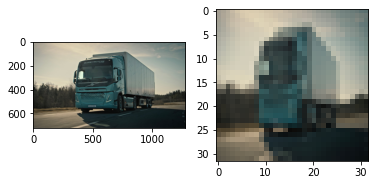

In [303]:
Image=im.open('9.jpg')
plt.subplot(1,2,1)
plt.imshow(Image)
Image=Image.resize((32,32))
Image=np.array(Image)
print(np.shape(Image))
plt.subplot(1,2,2)
plt.imshow(Image)

## **Result** **Clasiffer**

In [304]:
Img=Image.reshape(1,32,32,3,1)
img=Img.astype('float32')/255
result=model.predict_classes(img)
result[0]


9